# **1. Perkenalan Dataset**


## **Dataset: Student Habits vs Academic Performance**
Dataset yang digunakan berjudul "Student Habits vs Academic Performance" dan tersedia di Kaggle. Dataset ini memuat 1000 observasi data siswa, yang merepresentasikan berbagai aspek gaya hidup, kebiasaan belajar, dan kondisi eksternal yang diduga memiliki pengaruh terhadap performa akademik, khususnya skor ujian siswa. Terdapat 16 fitur dalam dataset ini, yang terdiri dari variabel demografis (seperti `age` dan `gender`), kebiasaan harian (`study_hours_per_day`, `social_media_hours`, `netflix_hours`), serta faktor eksternal seperti kualitas internet dan pendidikan orang tua. Fitur target dari dataset ini adalah `exam_score`, yang merepresentasikan nilai ujian siswa.


Sumber: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance <br>

## **Deskripsi Kolom**

| No. | Kolom                             | Deskripsi                                                                   |
|-----|-----------------------------------|-----------------------------------------------------------------------------|
| 1   | **student_id**                    | ID unik untuk setiap siswa                                                  |
| 2   | **age**                           | Usia siswa dalam tahun                                                      |
| 3   | **gender**                        | Jenis kelamin siswa (`Male` / `Female`)                                     |
| 4   | **study_hours_per_day**           | Jumlah jam belajar per hari                                                 |
| 5   | **social_media_hours**            | Jumlah jam penggunaan media sosial per hari                                 |
| 6   | **netflix_hours**                 | Jumlah jam menonton Netflix per hari                                        |
| 7   | **part_time_job**                 | Status pekerjaan paruh waktu (`Yes` / `No`)                                 |
| 8   | **attendance_percentage**         | Persentase kehadiran siswa di kelas (0 - 100%)                              |
| 9   | **sleep_hours**                   | Jumlah jam tidur per hari                                                   |
| 10  | **diet_quality**                  | Kualitas pola makan siswa (`Poor` / `Average` / `Good`)                     |   
| 11  | **exercise_frequency**            | Frekuensi olahraga dalam seminggu                                           |
| 12  | **parental_education_level**      | Tingkat pendidikan tertinggi orang tua                                      |
| 13  | **internet_quality**              | Kualitas koneksi internet (`Poor` / `Average` / `Good`)                     |
| 14  | **mental_health_rating**          | Penilaian kesehatan mental siswa (skala 1 - 5, semakin tinggi semakin baik) |
| 15  | **extracurricular_participation** | Partisipasi dalam kegiatan ekstrakurikuler (`Yes` / `No`)                   |
| 16  | **exam_score**                    | Skor ujian siswa (target variabel untuk prediksi)                           |

## **Tujuan**
Tujuan utama dari analisis ini adalah memprediksi nilai ujian (exam_score) siswa menggunakan pendekatan regresi machine learning.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Saya memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../student_habits_performance_raw.csv')

In [3]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Mengecek Missing Values

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64


## Distribusi exam_score

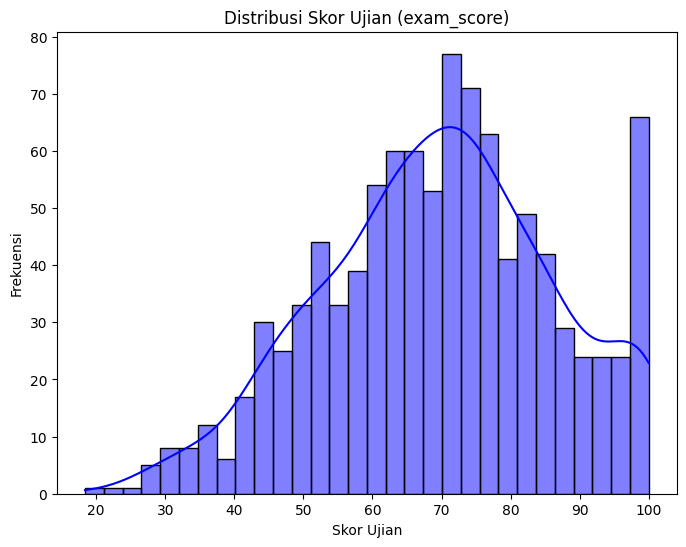

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['exam_score'], bins=30, kde=True, color='blue')
plt.title('Distribusi Skor Ujian (exam_score)')
plt.xlabel('Skor Ujian')
plt.ylabel('Frekuensi')
plt.show()

## Korelasi antar fitur numerik

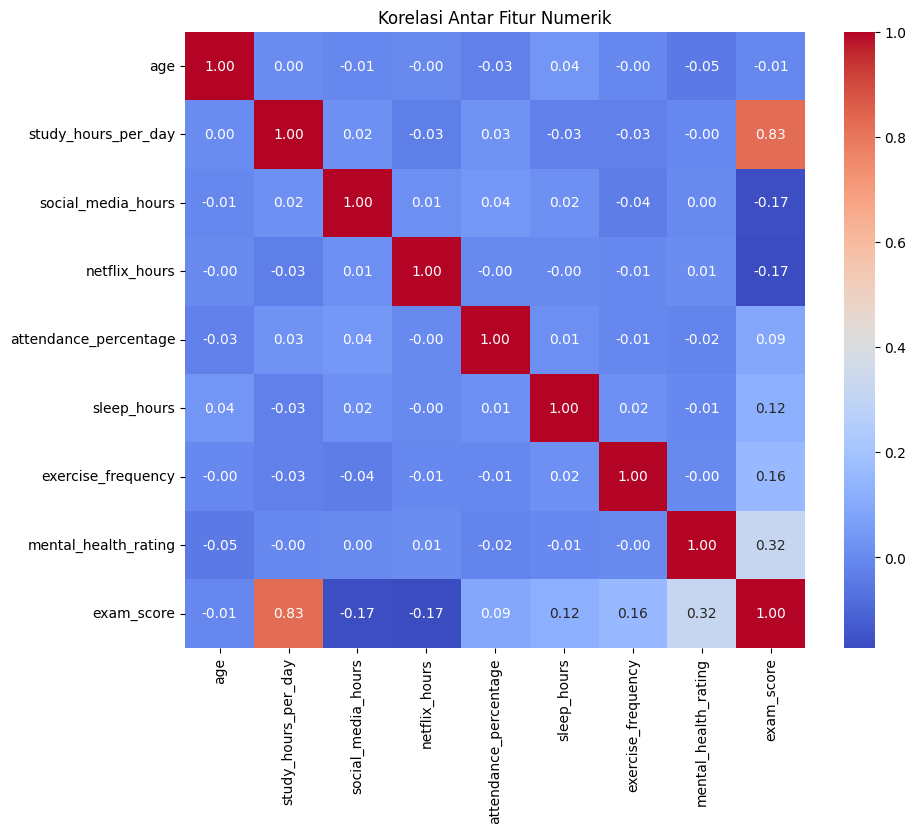

In [8]:
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

## Hubungan study_hours_per_day vs exam_score

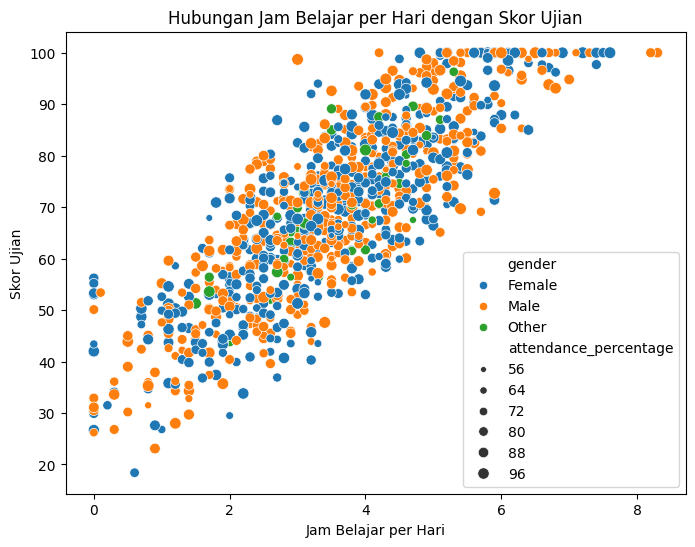

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='gender', size='attendance_percentage', data=df)
plt.title('Hubungan Jam Belajar per Hari dengan Skor Ujian')
plt.xlabel('Jam Belajar per Hari')
plt.ylabel('Skor Ujian')
plt.show()

## Distribusi exam_score berdasarkan diet_quality

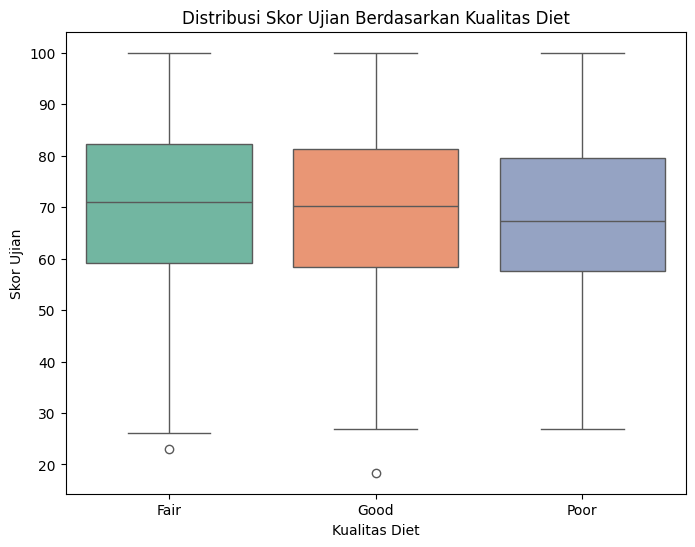

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='diet_quality', y='exam_score', hue='diet_quality', data=df, palette='Set2')
plt.title('Distribusi Skor Ujian Berdasarkan Kualitas Diet')
plt.xlabel('Kualitas Diet')
plt.ylabel('Skor Ujian')
plt.show()

## Distribusi exam_score berdasarkan extracurricular_participation

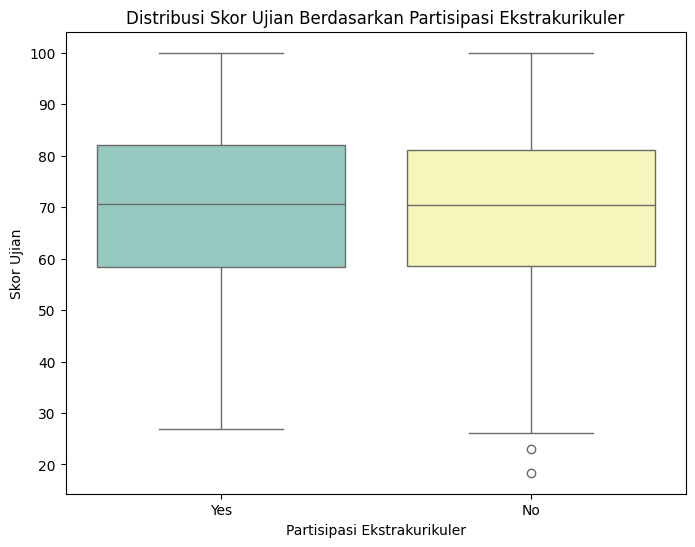

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='extracurricular_participation', y='exam_score', hue='extracurricular_participation', data=df, palette='Set3')
plt.title('Distribusi Skor Ujian Berdasarkan Partisipasi Ekstrakurikuler')
plt.xlabel('Partisipasi Ekstrakurikuler')
plt.ylabel('Skor Ujian')
plt.show()

## Cek outlier pada social_media_hours dan netflix_hours

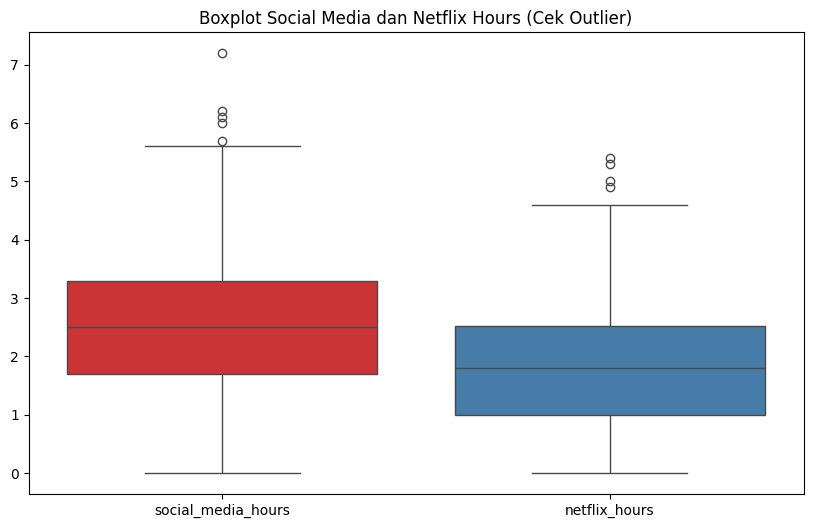

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['social_media_hours', 'netflix_hours']], palette='Set1')
plt.title('Boxplot Social Media dan Netflix Hours (Cek Outlier)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Feature Engineering

### productivity_ratio

In [13]:
df['productivity_ratio'] = df['study_hours_per_day'] / (df['social_media_hours'] + df['netflix_hours'] + 1)

### binning sleep_hours

In [14]:
bins = [0, 6, 8, float('inf')]
labels = ['Kurang', 'Cukup', 'Berlebih']
df['sleep_category'] = pd.cut(df['sleep_hours'], bins=bins, labels=labels, include_lowest=True)

## Menangani missing values di parental_education_level

In [15]:
imputer = SimpleImputer(strategy='most_frequent')
df['parental_education_level'] = imputer.fit_transform(df[['parental_education_level']]).ravel()

## Encoding kolom kategorikal

In [16]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                    'internet_quality', 'extracurricular_participation', 'sleep_category']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Menghapus kolom student_id

In [17]:
df = df.drop('student_id', axis=1)

## Normalisasi fitur numerik

In [18]:
numeric_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 
                'attendance_percentage', 'sleep_hours', 'exercise_frequency', 
                'mental_health_rating', 'productivity_ratio']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## Menyimpan dataset yang sudah diproses

In [19]:
df.to_csv('student_habits_preprocessing.csv', index=False)
print("\nDataset yang sudah diproses disimpan sebagai 'student_habits_preprocessing.csv'")


Dataset yang sudah diproses disimpan sebagai 'student_habits_preprocessing.csv'


## Menampilkan 5 baris pertama dataset yang sudah diproses

In [20]:
df_preprocessed = pd.read_csv('student_habits_preprocessing.csv')
df_preprocessed.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,productivity_ratio,sleep_category
0,1.084551,0,-2.418068,-1.114064,-0.669750,0,0.092426,1.248120,0,1.461166,2,0,0.900186,1,56.2,-1.672147,1
1,-0.215870,0,2.281707,0.251315,0.446965,0,1.401696,-1.525661,1,1.461166,1,0,0.900186,0,100.0,0.860316,2
2,0.217604,1,-1.464491,0.507324,-0.483631,0,1.135584,1.248120,2,-1.008689,1,2,-1.559339,0,34.3,-1.091706,1
3,1.084551,0,-1.736942,1.190013,-0.762810,0,-1.397800,2.227102,2,0.473224,2,1,-1.559339,1,26.8,-1.292682,0
4,-0.649344,0,0.987566,1.616694,-1.228108,0,0.720450,-1.280916,0,-0.020747,2,1,-1.559339,0,66.4,0.225179,2
